# About Dataset


# **Dataset Sintetis untuk Penilaian Risiko dan Pemodelan Persetujuan Pinjaman**
link dataset : https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?select=Loan.csv

Dataset sintetis ini terdiri dari **20.000 catatan** data pribadi dan keuangan yang dirancang untuk memfasilitasi pengembangan model prediktif untuk penilaian risiko. Dataset ini memiliki dua tujuan utama:

- **Regresi Skor Risiko**: Untuk memprediksi **skor risiko** kontinu yang terkait dengan kemungkinan seseorang gagal bayar atau mengalami ketidakstabilan keuangan.
- **Klasifikasi Biner**: Untuk menentukan hasil **biner** dari persetujuan pinjaman, yang menunjukkan apakah pemohon kemungkinan akan disetujui atau ditolak untuk pinjaman.

Dataset ini mencakup berbagai fitur seperti informasi **demografis**, **riwayat kredit**, **status pekerjaan**, **tingkat pendapatan**, **hutang yang ada**, dan metrik keuangan relevan lainnya, memberikan dasar yang komprehensif untuk analisis berbasis data yang canggih dan pengambilan keputusan.

---

### **Dataset ini mencakup kolom-kolom berikut:**

- **ApplicationDate**: Tanggal aplikasi pinjaman
- **Age**: Usia pemohon
- **AnnualIncome**: Pendapatan tahunan
- **CreditScore**: Skor kelayakan kredit
- **EmploymentStatus**: Status pekerjaan
- **EducationLevel**: Tingkat pendidikan tertinggi
- **Experience**: Pengalaman kerja
- **LoanAmount**: Jumlah pinjaman yang diminta
- **LoanDuration**: Periode pembayaran pinjaman
- **MaritalStatus**: Status pernikahan pemohon
- **NumberOfDependents**: Jumlah tanggungan
- **HomeOwnershipStatus**: Status kepemilikan rumah
- **MonthlyDebtPayments**: Pembayaran utang bulanan
- **CreditCardUtilizationRate**: Persentase penggunaan kartu kredit
- **NumberOfOpenCreditLines**: Jumlah jalur kredit yang aktif
- **NumberOfCreditInquiries**: Jumlah pengecekan kredit
- **DebtToIncomeRatio**: Rasio utang terhadap pendapatan
- **BankruptcyHistory**: Riwayat kebangkrutan
- **LoanPurpose**: Tujuan pinjaman
- **PreviousLoanDefaults**: Gagal bayar pinjaman sebelumnya
- **PaymentHistory**: Riwayat pembayaran
- **LengthOfCreditHistory**: Durasi sejarah kredit
- **SavingsAccountBalance**: Saldo tabungan
- **CheckingAccountBalance**: Saldo rekening giro
- **TotalAssets**: Total aset yang dimiliki
- **TotalLiabilities**: Total utang yang dimiliki
- **MonthlyIncome**: Pendapatan bulanan
- **UtilityBillsPaymentHistory**: Riwayat pembayaran tagihan utilitas
- **JobTenure**: Lama bekerja
- **NetWorth**: Kekayaan bersih
- **BaseInterestRate**: Suku bunga awal
- **InterestRate**: Suku bunga yang diterapkan
- **MonthlyLoanPayment**: Pembayaran pinjaman bulanan
- **TotalDebtToIncomeRatio**: Total utang terhadap pendapatan
- **LoanApproved**: Status persetujuan pinjaman
- **RiskScore**: Skor penilaian risiko



# Import Library

In [ ]:
pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif

from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
import tensorflowjs as tfjs

import joblib
import pickle

# Load Data


In [ ]:
pd.set_option('display.max_columns',None)

df = pd.read_csv('/content/drive/MyDrive/Coding Camp - DBS Fundation/Dataset Capstone/Loan Approval/Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
df['PreviousLoanDefaults'].unique()

array([0, 1])

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
df.describe(include='all')

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,20000.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2072-09-17,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,NaN,Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,10041,NaN,7939,NaN,NaN,NaN,NaN,NaN,NaN,5925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.752600,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,1.517300,NaN,454.292700,0.286381,3.023350,0.993000,0.285735,0.052400,NaN,0.100050,23.993650,14.957300,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,NaN,11.622713,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,1.386325,NaN,240.507609,0.159793,1.736161,0.986965,0.160211,0.222838,NaN,0.300074,4.945436,8.371552,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,0.000000,NaN,50.000000,0.000974,0.000000,0.000000,0.001720,0.000000,NaN,0.000000,8.000000,1.000000,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,NaN,32.000000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,0.000000,NaN,286.000000,0.160794,2.000000,0.000000,0.161035,0.000000,NaN,0.000000,21.000000,8.000000,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,1.000000,NaN,402.000000,0.266673,3.000000,1.000000,0.264454,0.000000,NaN,0.000000,24.000000,15.000000,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,2.000000,NaN,564.000000,0.390634,4.000000,2.000000,0.390327,0.000000,NaN,0.000000,27.000000,22.000000,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


In [ ]:
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
    unique_vals = df[col].value_counts()
    print(f'{col} has {len(unique_vals)} unique values')

ApplicationDate has 20000 unique values
Age has 63 unique values
AnnualIncome has 17516 unique values
CreditScore has 322 unique values
EmploymentStatus has 3 unique values
EducationLevel has 5 unique values
Experience has 62 unique values
LoanAmount has 15578 unique values
LoanDuration has 10 unique values
MaritalStatus has 4 unique values
NumberOfDependents has 6 unique values
HomeOwnershipStatus has 4 unique values
MonthlyDebtPayments has 1299 unique values
CreditCardUtilizationRate has 20000 unique values
NumberOfOpenCreditLines has 14 unique values
NumberOfCreditInquiries has 8 unique values
DebtToIncomeRatio has 20000 unique values
BankruptcyHistory has 2 unique values
LoanPurpose has 5 unique values
PreviousLoanDefaults has 2 unique values
PaymentHistory has 38 unique values
LengthOfCreditHistory has 29 unique values
SavingsAccountBalance has 9199 unique values
CheckingAccountBalance has 5151 unique values
TotalAssets has 18814 unique values
TotalLiabilities has 17163 unique val

In [ ]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [ ]:
grab_dataset_cols = grab_col_names(df)

Jumlah observasi: 20000
Jumlah variabel: 36
Kolom kategorikal: 10
Kolom Numerik: 25
Kategori tapi kardinal: 1
Numerik tapi kategorikal: 10


In [ ]:
# Memvisualisasikan distribusi kolom-kolom kategorikal dalam sebuah dataframe menggunakan dua jenis plot: countplot dan pie plot
def plot_categorical(dataframe, categorical_columns): # membuat visualisasi untuk kolom kategorikal dalam dataset.
    num_cols = len(categorical_columns) # daftar kolom kategorikal yang akan divisualisasikan.
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Countplot: Membuat countplot untuk distribusi jumlah kategori.
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) # menunjukkan jumlah observasi dalam setiap kategori menggunakan bar chart.
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # Pieplot: Membuat pieplot untuk distribusi proporsi kategori.
        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) # menampilkan proporsi kategori dalam bentuk diagram lingkaran.
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    # Menyesuaikan layout dengan plt.tight_layout() untuk hasil visualisasi yang rapi.
    plt.tight_layout()
    plt.show()

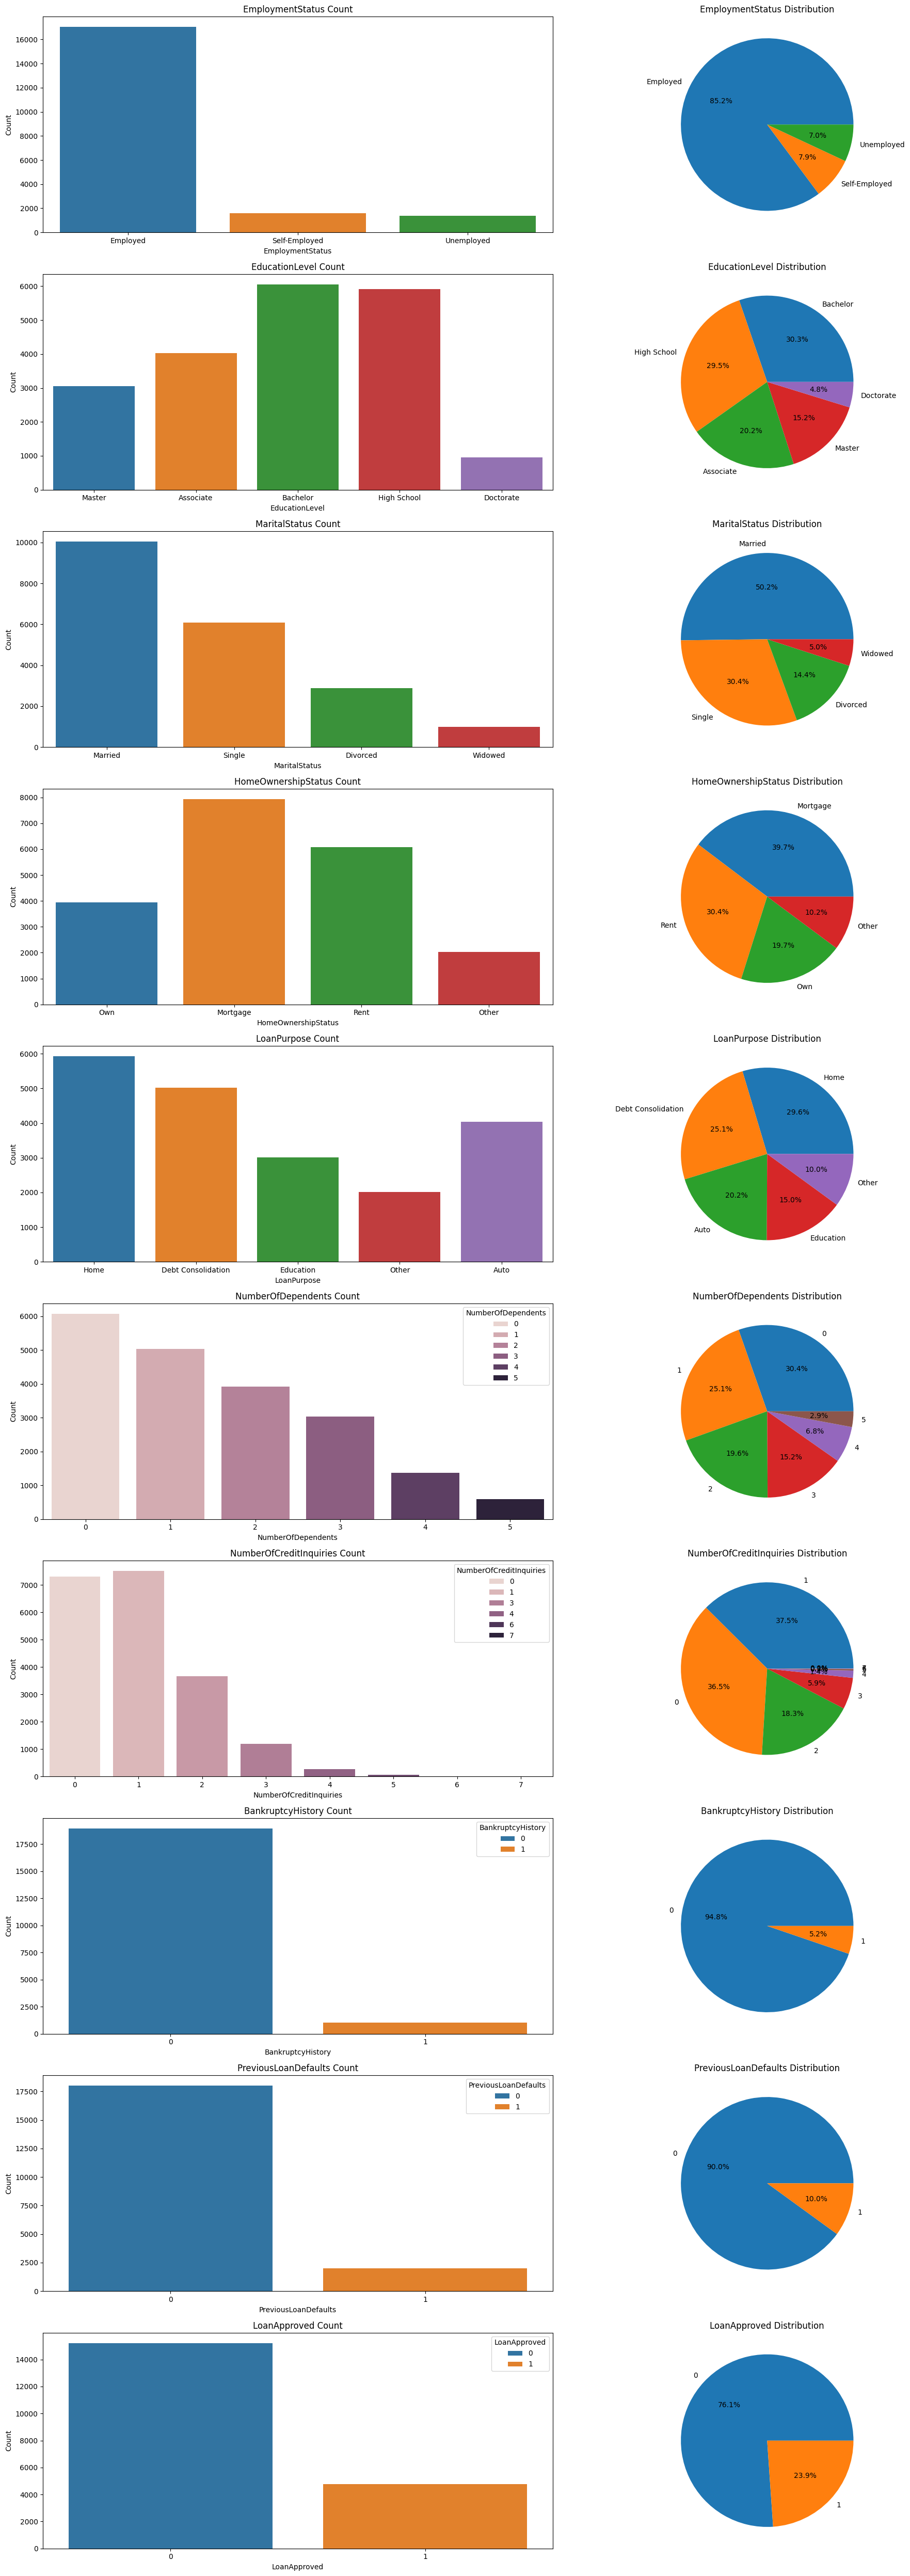

In [ ]:
vis_categorical = plot_categorical(df, grab_dataset_cols[0])

In [ ]:
# Membuat histogram bagi setiap kolom numerik dalam sebuah dataframe
def plot_histograms(dataframe, numeric_columns): # membuat histogram untuk setiap kolom numerik dalam dataset.

    num_cols = len(numeric_columns) # daftar kolom numerik yang akan divisualisasikan.
    num_rows = (num_cols + 1) // 4 + ((num_cols + 1) % 4 != 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20)  # Untuk mengurangi ukurannya, kami mengurangi nilai tempat sampah.
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])  # Jika jumlah kolom tidak habis dibagi 4, hapus sumbu yang berlebihan

    # menampilkan histogram frekuensi untuk setiap kolom numerik.
    plt.tight_layout()
    plt.show()

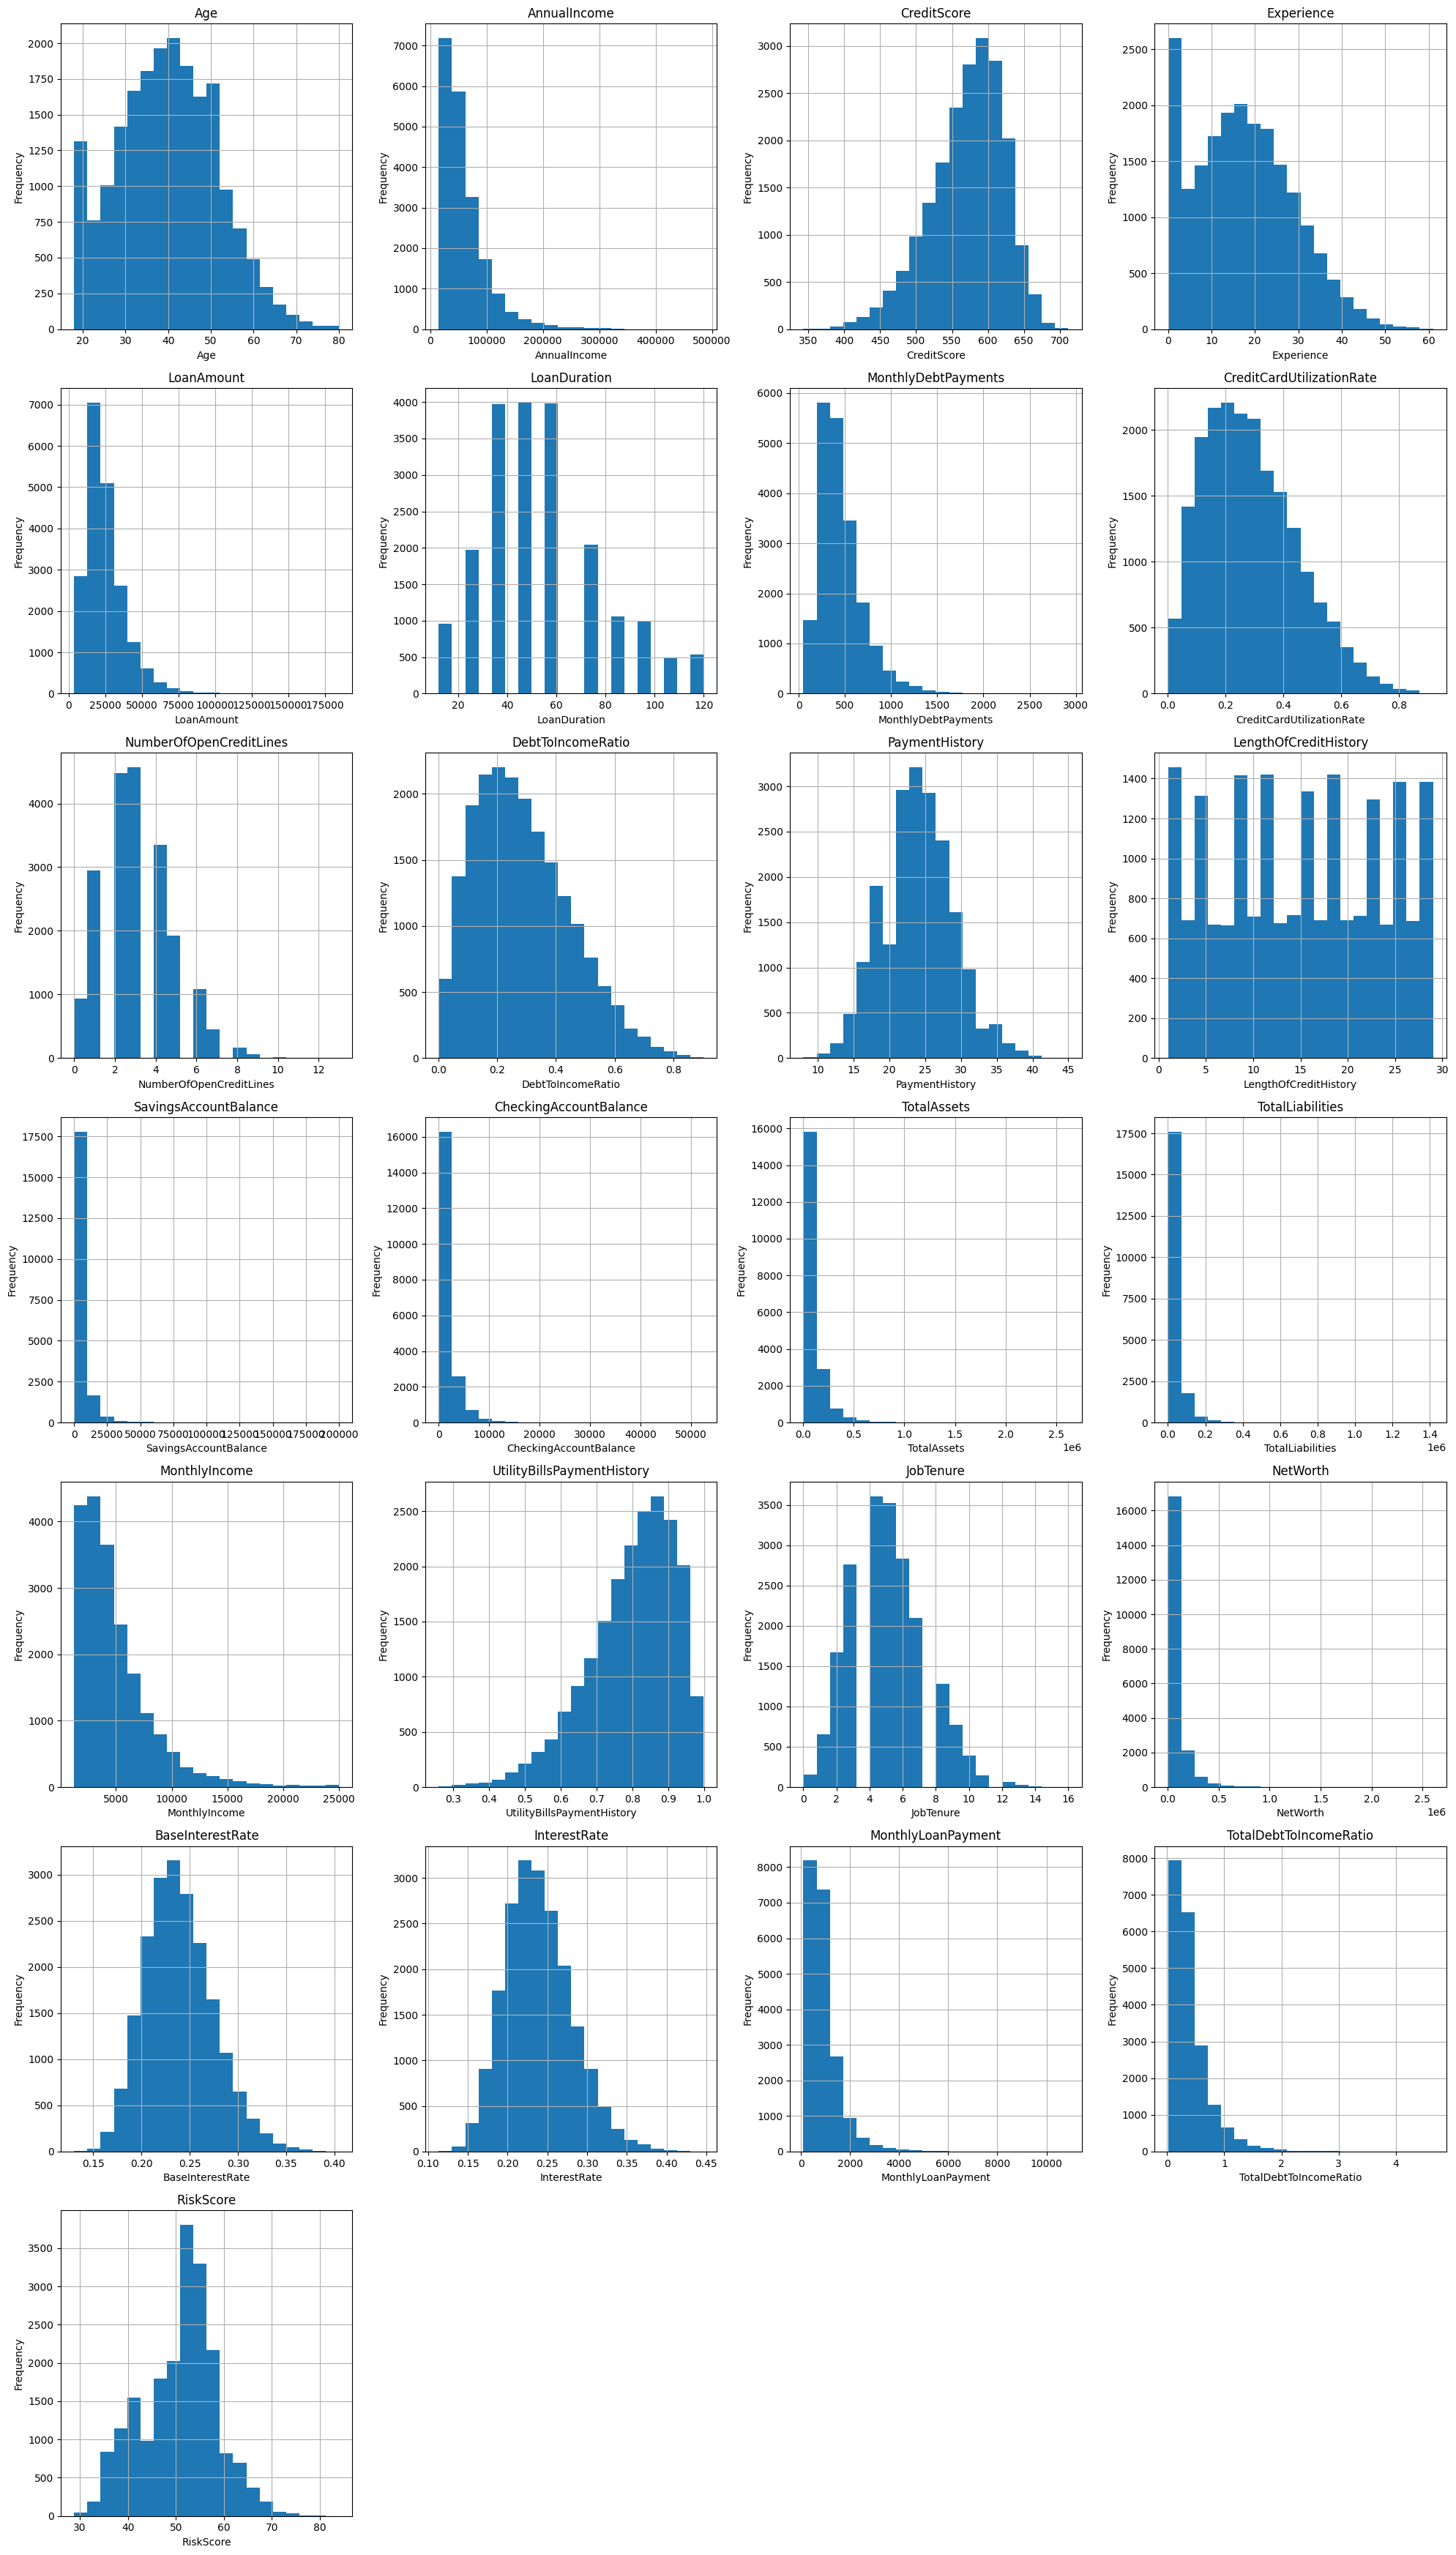

In [ ]:
vis_numerical = plot_histograms(df, grab_dataset_cols[1])

In [ ]:
def identity_outliers(dataframe, q1=0.05, q3=0.95):
    # Filter numeric columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns

    # Set up the subplot grid for side-by-side visualization
    num_columns = 4  # Number of columns per row for the grid
    num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Calculate required number of rows

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, num_rows * 5))
    axes = axes.flatten()  # Flatten axes array for easier indexing

    outlier_results = {}

    # Loop through each numeric column to detect outliers and plot
    for idx, col_name in enumerate(numeric_columns):
        # Calculate quartiles and IQR
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        iqr = quartile3 - quartile1
        lower_bound = quartile1 - (1.5 * iqr)
        upper_bound = quartile3 + (1.5 * iqr)

        # Identify outliers
        outliers = dataframe[(dataframe[col_name] < lower_bound) | (dataframe[col_name] > upper_bound)]
        outlier_results[col_name] = outliers

        # Plotting boxplot for each column
        sns.boxplot(x=dataframe[col_name], color='skyblue', width=0.5, ax=axes[idx])
        axes[idx].axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
        axes[idx].axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound')
        axes[idx].set_title(f'Outlier Detection for {col_name}')
        axes[idx].legend()

    # Hide empty subplots if any
    for i in range(len(numeric_columns), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()  # Adjust layout for better spacing between plots
    plt.show()

    return outlier_results

# Example usage
# outliers_all = identity_outliers_all_numeric_grid(dataframe)


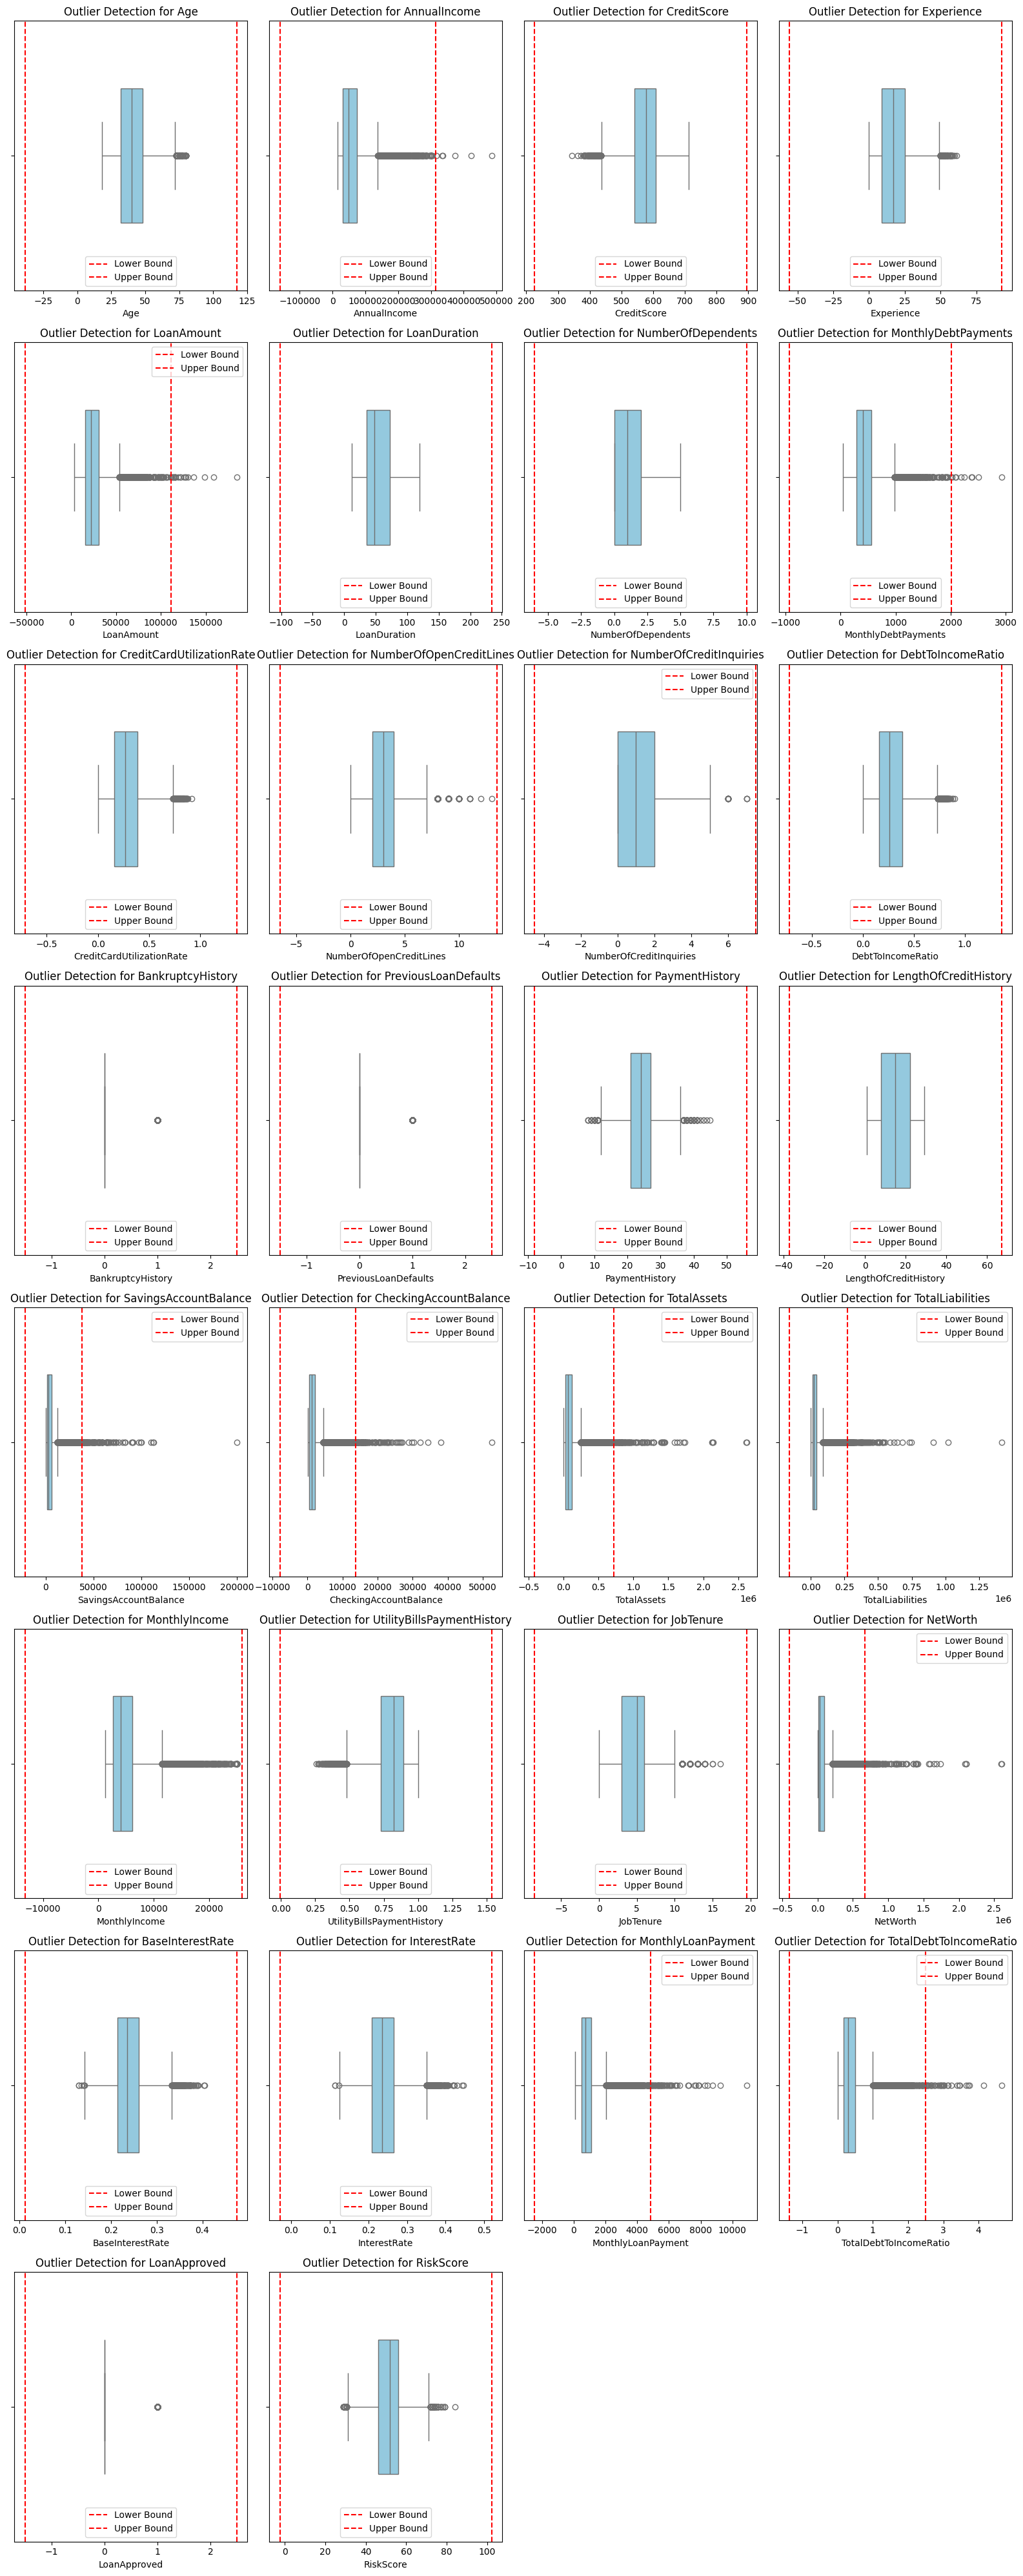

In [ ]:
outliers = identity_outliers(df)

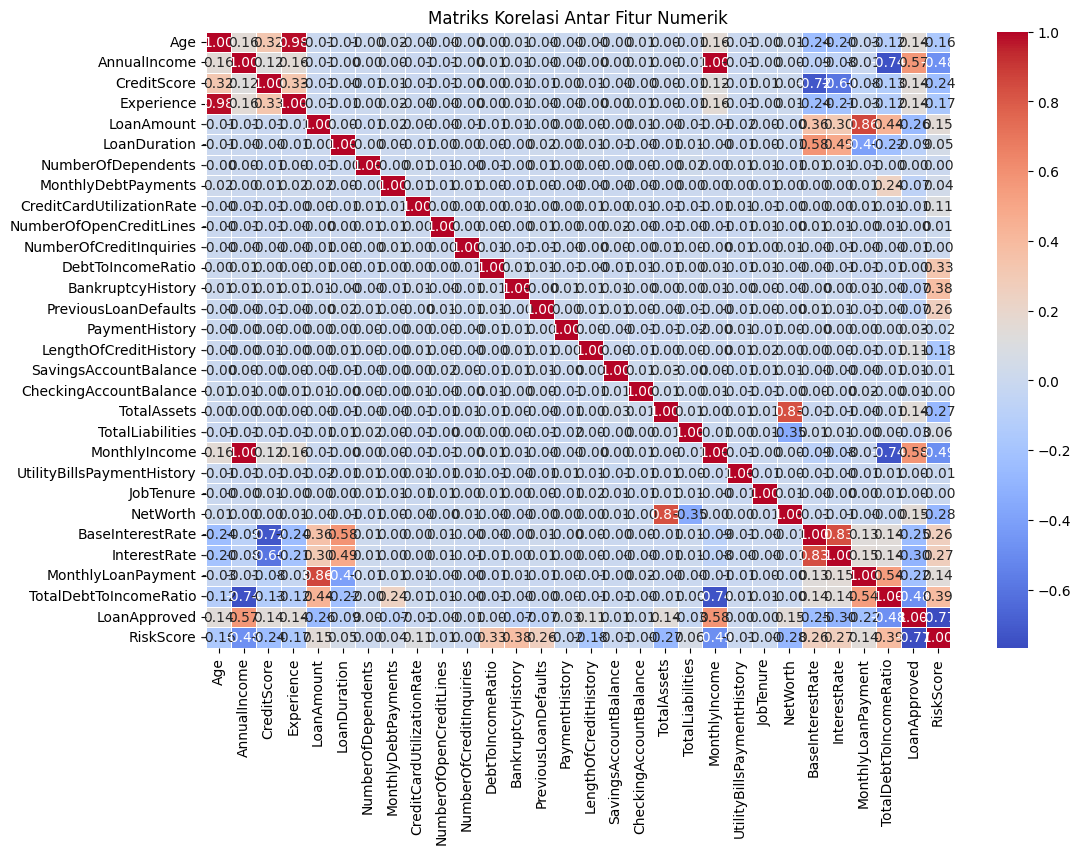

In [ ]:
# Menghitung matriks korelasi
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Menampilkan korelasi sebagai heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

# Preprocessing


## Rename Colom

In [ ]:
column_mapping = {
    'ApplicationDate': 'Tanggal_Aplikasi',
    'Age': 'Usia_Pemohon',
    'AnnualIncome': 'Pendapatan_Tahunan',
    'CreditScore': 'Skor_Kelayakan_Kredit',
    'EmploymentStatus': 'Status_Pekerjaan',
    'EducationLevel': 'Tingkat_Pendidikan',
    'Experience': 'Pengalaman_Kerja',
    'LoanAmount': 'Jumlah_Pinjaman',
    'LoanDuration': 'Periode_Pembayaran_Pinjaman',
    'MaritalStatus': 'Status_Pernikahan_Pemohon',
    'NumberOfDependents': 'Jumlah_Tanggungan',
    'HomeOwnershipStatus': 'Status_Kepemilikan_Rumah',
    'MonthlyDebtPayments': 'Pembayaran_Utang_Bulanan',
    'CreditCardUtilizationRate': 'Persentase_Penggunaan_Kartu_Kredit',
    'NumberOfOpenCreditLines': 'Jumlah_Jalur_Kredit_Aktif',
    'NumberOfCreditInquiries': 'Jumlah_Pengecekan_Kredit',
    'DebtToIncomeRatio': 'Rasio_Utang_Terhadap_Pendapatan',
    'BankruptcyHistory': 'Riwayat_Kebangkrutan',
    'LoanPurpose': 'Tujuan_Pinjaman',
    'PreviousLoanDefaults': 'Gagal_Bayar_Pinjaman_Sebelumnya',
    'PaymentHistory': 'Riwayat_Pembayaran',
    'LengthOfCreditHistory': 'Durasi_Sejarah_Kredit',
    'SavingsAccountBalance': 'Saldo_Tabungan',
    'CheckingAccountBalance': 'Saldo_Rekening_Giro',
    'TotalAssets': 'Total_Aset',
    'TotalLiabilities': 'Total_Kewajiban',
    'MonthlyIncome': 'Pendapatan_Bulanan',
    'UtilityBillsPaymentHistory': 'Riwayat_Pembayaran_Tagihan_Utilitas',
    'JobTenure': 'Lama_Bekerja',
    'NetWorth': 'Kekayaan_Bersih',
    'BaseInterestRate': 'Suku_Bunga_Awal',
    'InterestRate': 'Suku_Bunga_Yang_Diterapkan',
    'MonthlyLoanPayment': 'Pembayaran_Pinjaman_Bulanan',
    'TotalDebtToIncomeRatio': 'Total_Utang_Terhadap_Pendapatan',
    'LoanApproved': 'Status_Persetujuan_Pinjaman',
    'RiskScore': 'Skor_Penilaian_Risiko'
}

# Apply the column mapping
df.rename(columns=column_mapping, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tanggal_Aplikasi                     20000 non-null  object 
 1   Usia_Pemohon                         20000 non-null  int64  
 2   Pendapatan_Tahunan                   20000 non-null  int64  
 3   Skor_Kelayakan_Kredit                20000 non-null  int64  
 4   Status_Pekerjaan                     20000 non-null  object 
 5   Tingkat_Pendidikan                   20000 non-null  object 
 6   Pengalaman_Kerja                     20000 non-null  int64  
 7   Jumlah_Pinjaman                      20000 non-null  int64  
 8   Periode_Pembayaran_Pinjaman          20000 non-null  int64  
 9   Status_Pernikahan_Pemohon            20000 non-null  object 
 10  Jumlah_Tanggungan                    20000 non-null  int64  
 11  Status_Kepemilikan_Rumah    

In [ ]:
df.isnull().sum()

,0
Tanggal_Aplikasi,0
Usia_Pemohon,0
Pendapatan_Tahunan,0
Skor_Kelayakan_Kredit,0
Status_Pekerjaan,0
Tingkat_Pendidikan,0
Pengalaman_Kerja,0
Jumlah_Pinjaman,0
Periode_Pembayaran_Pinjaman,0
Status_Pernikahan_Pemohon,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
object_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object"]]
object_cols

['Tanggal_Aplikasi',
 'Status_Pekerjaan',
 'Tingkat_Pendidikan',
 'Status_Pernikahan_Pemohon',
 'Status_Kepemilikan_Rumah',
 'Tujuan_Pinjaman']

In [ ]:
# Iterate through the list of object column names
for col in object_cols:
    # Print the unique values for each column
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 30) # Print a separator for readability

Unique values for column 'Tanggal_Aplikasi':
['2018-01-01' '2018-01-02' '2018-01-03' ... '2072-10-01' '2072-10-02'
 '2072-10-03']
------------------------------
Unique values for column 'Status_Pekerjaan':
['Employed' 'Self-Employed' 'Unemployed']
------------------------------
Unique values for column 'Tingkat_Pendidikan':
['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
------------------------------
Unique values for column 'Status_Pernikahan_Pemohon':
['Married' 'Single' 'Divorced' 'Widowed']
------------------------------
Unique values for column 'Status_Kepemilikan_Rumah':
['Own' 'Mortgage' 'Rent' 'Other']
------------------------------
Unique values for column 'Tujuan_Pinjaman':
['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']
------------------------------


## Convert to IDR

In [ ]:
exchange_rate = 16.500

df['Jumlah_Pinjaman'] = df['Jumlah_Pinjaman'] * exchange_rate
df['Pendapatan_Bulanan'] = df['Pendapatan_Bulanan'] * exchange_rate
df['Pendapatan_Tahunan'] = df['Pendapatan_Tahunan'] * exchange_rate
df['Total_Aset'] = df['Total_Aset'] * exchange_rate
df['Saldo_Tabungan'] = df['Saldo_Tabungan'] * exchange_rate
df['Saldo_Rekening_Giro'] = df['Saldo_Rekening_Giro'] * exchange_rate
df['Total_Kewajiban'] = df['Total_Kewajiban'] * exchange_rate
df['Kekayaan_Bersih'] = df['Kekayaan_Bersih'] * exchange_rate
df['Pembayaran_Pinjaman_Bulanan'] = df['Pembayaran_Pinjaman_Bulanan'] * exchange_rate
df['Pembayaran_Utang_Bulanan'] = df['Pembayaran_Utang_Bulanan'] * exchange_rate

In [ ]:
df.head()

,Tanggal_Aplikasi,Usia_Pemohon,Pendapatan_Tahunan,Skor_Kelayakan_Kredit,Status_Pekerjaan,Tingkat_Pendidikan,Pengalaman_Kerja,Jumlah_Pinjaman,Periode_Pembayaran_Pinjaman,Status_Pernikahan_Pemohon,Jumlah_Tanggungan,Status_Kepemilikan_Rumah,Pembayaran_Utang_Bulanan,Persentase_Penggunaan_Kartu_Kredit,Jumlah_Jalur_Kredit_Aktif,Jumlah_Pengecekan_Kredit,Rasio_Utang_Terhadap_Pendapatan,Riwayat_Kebangkrutan,Tujuan_Pinjaman,Gagal_Bayar_Pinjaman_Sebelumnya,Riwayat_Pembayaran,Durasi_Sejarah_Kredit,Saldo_Tabungan,Saldo_Rekening_Giro,Total_Aset,Total_Kewajiban,Pendapatan_Bulanan,Riwayat_Pembayaran_Tagihan_Utilitas,Lama_Bekerja,Kekayaan_Bersih,Suku_Bunga_Awal,Suku_Bunga_Yang_Diterapkan,Pembayaran_Pinjaman_Bulanan,Total_Utang_Terhadap_Pendapatan,Status_Persetujuan_Pinjaman,Skor_Penilaian_Risiko
0,2018-01-01,45,659142.0,617,Employed,Master,22,217008.0,48,Married,2,Own,3019.5,0.354418,1,2,0.358336,0,Home,0,29,9,125928.0,19833.0,2410831.5,316519.5,54928.500,0.724972,11,2094312.0,0.199652,0.227590,6926.798861,0.181077,0,49.0
1,2018-01-02,38,655198.5,628,Employed,Associate,15,429742.5,48,Single,1,Mortgage,8184.0,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,76345.5,57090.0,877866.0,158317.5,54599.875,0.935132,3,719548.5,0.207045,0.201077,13101.894931,0.389852,0,52.0
2,2018-01-03,47,671946.0,570,Employed,Bachelor,26,290845.5,36,Married,2,Rent,14883.0,0.137414,2,0,0.244729,0,Education,0,20,22,14619.0,14767.5,415404.0,2126421.0,55995.500,0.872241,6,85882.5,0.217627,0.212548,10995.710347,0.462157,0,52.0
3,2018-01-04,58,1139886.0,545,Employed,High School,34,625317.0,96,Single,1,Mortgage,12457.5,0.267587,2,1,0.436244,0,Home,0,27,10,27637.5,20080.5,1729563.0,88605.0,94990.500,0.896155,5,1640958.0,0.300398,0.300911,17283.865174,0.313098,0,54.0
4,2018-01-05,37,1703856.0,594,Employed,Associate,17,151536.0,36,Married,1,Mortgage,4521.0,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,25657.5,82186.5,4031032.5,285219.0,141988.000,0.941369,5,3745813.5,0.197184,0.175990,5447.955818,0.070210,1,36.0


## Mapping Education Level

In [ ]:
df['Tingkat_Pendidikan'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [ ]:
df['Tingkat_Pendidikan'] = df['Tingkat_Pendidikan'].map({'High School':'SMA', 'Associate': 'Diploma', 'Bachelor': 'Sarjana', 'Master': 'Magister', 'Doctorate': 'Doktor'})

In [ ]:
df['Tingkat_Pendidikan'].unique()

array(['Magister', 'Diploma', 'Sarjana', 'SMA', 'Doktor'], dtype=object)

## Mapping Employment

In [ ]:
df['Status_Pekerjaan'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [ ]:
df['Status_Pekerjaan'] = df['Status_Pekerjaan'].map({'Employed': 'Pegawai', 'Self-Employed': 'Wiraswasta', 'Unemployed': 'Tidak Bekerja'})

In [ ]:
df['Status_Pekerjaan'].unique()

array(['Pegawai', 'Wiraswasta', 'Tidak Bekerja'], dtype=object)

## Mapping MaritalStatus

In [ ]:
df['Status_Pernikahan_Pemohon'].unique()

array(['Married', 'Single', 'Divorced', 'Widowed'], dtype=object)

In [ ]:
df['Status_Pernikahan_Pemohon'] = df['Status_Pernikahan_Pemohon'].map({'Married': 'Menikah', 'Single': 'Single', 'Divorced': 'Cerai', 'Widowed': 'Janda'})

In [ ]:
df['Status_Pernikahan_Pemohon'].unique()

array(['Menikah', 'Single', 'Cerai', 'Janda'], dtype=object)

## Mapping HomeOwnershipStatus

In [ ]:
df['Status_Kepemilikan_Rumah'].unique()

array(['Own', 'Mortgage', 'Rent', 'Other'], dtype=object)

In [ ]:
df['Status_Kepemilikan_Rumah'] = df['Status_Kepemilikan_Rumah'].map({'Own': 'Sendiri', 'Rent': 'Sewa', 'Mortgage': 'Pinjaman', 'Other': 'Lainnya'})

In [ ]:
df['Status_Kepemilikan_Rumah'].unique()

array(['Sendiri', 'Pinjaman', 'Sewa', 'Lainnya'], dtype=object)

## Mapping LoanPurpose

In [ ]:
df['Tujuan_Pinjaman'].unique()

array(['Home', 'Debt Consolidation', 'Education', 'Other', 'Auto'],
      dtype=object)

In [ ]:
df['Tujuan_Pinjaman'] = df['Tujuan_Pinjaman'].map({'Home': 'Rumah', 'Debt Consolidation': 'Bisnis', 'Education': 'Pendidikan', 'Other': 'Lainnya', 'Auto': 'Kendaraan'})

In [ ]:
df['Tujuan_Pinjaman'].unique()

array(['Rumah', 'Bisnis', 'Pendidikan', 'Lainnya', 'Kendaraan'],
      dtype=object)

## Encoding

In [ ]:
le = LabelEncoder()

education_order = ['SMA',  'Diploma' , 'Sarjana' , 'Magister' , 'Doktor']
ordinal_encoder = OrdinalEncoder(categories=[education_order])

df['Tingkat_Pendidikan'] = ordinal_encoder.fit_transform(df[['Tingkat_Pendidikan']])
df['Status_Pernikahan_Pemohon'] = le.fit_transform(df['Status_Pernikahan_Pemohon'])
df['Status_Kepemilikan_Rumah'] = le.fit_transform(df['Status_Kepemilikan_Rumah'])
df['Status_Pekerjaan'] = le.fit_transform(df['Status_Pekerjaan'])
df['Tujuan_Pinjaman'] = le.fit_transform(df['Tujuan_Pinjaman'])

In [ ]:
df.head()

,Tanggal_Aplikasi,Usia_Pemohon,Pendapatan_Tahunan,Skor_Kelayakan_Kredit,Status_Pekerjaan,Tingkat_Pendidikan,Pengalaman_Kerja,Jumlah_Pinjaman,Periode_Pembayaran_Pinjaman,Status_Pernikahan_Pemohon,Jumlah_Tanggungan,Status_Kepemilikan_Rumah,Pembayaran_Utang_Bulanan,Persentase_Penggunaan_Kartu_Kredit,Jumlah_Jalur_Kredit_Aktif,Jumlah_Pengecekan_Kredit,Rasio_Utang_Terhadap_Pendapatan,Riwayat_Kebangkrutan,Tujuan_Pinjaman,Gagal_Bayar_Pinjaman_Sebelumnya,Riwayat_Pembayaran,Durasi_Sejarah_Kredit,Saldo_Tabungan,Saldo_Rekening_Giro,Total_Aset,Total_Kewajiban,Pendapatan_Bulanan,Riwayat_Pembayaran_Tagihan_Utilitas,Lama_Bekerja,Kekayaan_Bersih,Suku_Bunga_Awal,Suku_Bunga_Yang_Diterapkan,Pembayaran_Pinjaman_Bulanan,Total_Utang_Terhadap_Pendapatan,Status_Persetujuan_Pinjaman,Skor_Penilaian_Risiko
0,2018-01-01,45,659142.0,617,0,3.0,22,217008.0,48,2,2,2,3019.5,0.354418,1,2,0.358336,0,4,0,29,9,125928.0,19833.0,2410831.5,316519.5,54928.500,0.724972,11,2094312.0,0.199652,0.227590,6926.798861,0.181077,0,49.0
1,2018-01-02,38,655198.5,628,0,1.0,15,429742.5,48,3,1,1,8184.0,0.087827,5,3,0.330274,0,0,0,21,9,76345.5,57090.0,877866.0,158317.5,54599.875,0.935132,3,719548.5,0.207045,0.201077,13101.894931,0.389852,0,52.0
2,2018-01-03,47,671946.0,570,0,2.0,26,290845.5,36,2,2,3,14883.0,0.137414,2,0,0.244729,0,3,0,20,22,14619.0,14767.5,415404.0,2126421.0,55995.500,0.872241,6,85882.5,0.217627,0.212548,10995.710347,0.462157,0,52.0
3,2018-01-04,58,1139886.0,545,0,0.0,34,625317.0,96,3,1,1,12457.5,0.267587,2,1,0.436244,0,4,0,27,10,27637.5,20080.5,1729563.0,88605.0,94990.500,0.896155,5,1640958.0,0.300398,0.300911,17283.865174,0.313098,0,54.0
4,2018-01-05,37,1703856.0,594,0,1.0,17,151536.0,36,2,1,1,4521.0,0.320535,0,0,0.078884,0,0,0,26,27,25657.5,82186.5,4031032.5,285219.0,141988.000,0.941369,5,3745813.5,0.197184,0.175990,5447.955818,0.070210,1,36.0


In [ ]:
joblib.dump(ordinal_encoder, 'ordinal_encoder.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

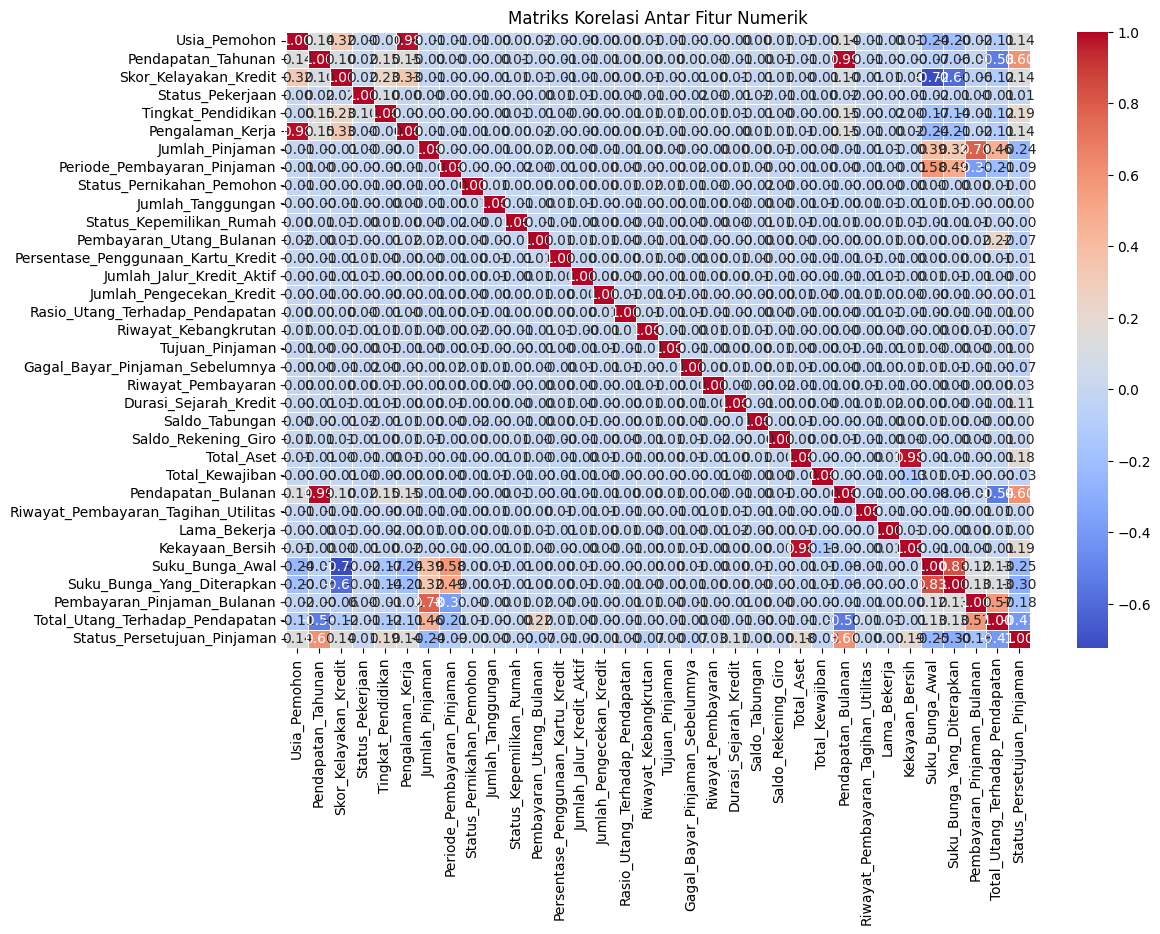

In [ ]:
correlation = df.drop(['Tanggal_Aplikasi', 'Skor_Penilaian_Risiko'], axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

# Modelling

In [ ]:
# Pisahkan fitur dan target
X = df.drop(['Status_Persetujuan_Pinjaman','Tanggal_Aplikasi'], axis=1)
y = df['Status_Persetujuan_Pinjaman']

In [ ]:
X.head()

,Usia_Pemohon,Pendapatan_Tahunan,Skor_Kelayakan_Kredit,Status_Pekerjaan,Tingkat_Pendidikan,Pengalaman_Kerja,Jumlah_Pinjaman,Periode_Pembayaran_Pinjaman,Status_Pernikahan_Pemohon,Jumlah_Tanggungan,Status_Kepemilikan_Rumah,Pembayaran_Utang_Bulanan,Persentase_Penggunaan_Kartu_Kredit,Jumlah_Jalur_Kredit_Aktif,Jumlah_Pengecekan_Kredit,Rasio_Utang_Terhadap_Pendapatan,Riwayat_Kebangkrutan,Tujuan_Pinjaman,Gagal_Bayar_Pinjaman_Sebelumnya,Riwayat_Pembayaran,Durasi_Sejarah_Kredit,Saldo_Tabungan,Saldo_Rekening_Giro,Total_Aset,Total_Kewajiban,Pendapatan_Bulanan,Riwayat_Pembayaran_Tagihan_Utilitas,Lama_Bekerja,Kekayaan_Bersih,Suku_Bunga_Awal,Suku_Bunga_Yang_Diterapkan,Pembayaran_Pinjaman_Bulanan,Total_Utang_Terhadap_Pendapatan,Skor_Penilaian_Risiko
0,45,659142.0,617,0,3.0,22,217008.0,48,2,2,2,3019.5,0.354418,1,2,0.358336,0,4,0,29,9,125928.0,19833.0,2410831.5,316519.5,54928.500,0.724972,11,2094312.0,0.199652,0.227590,6926.798861,0.181077,49.0
1,38,655198.5,628,0,1.0,15,429742.5,48,3,1,1,8184.0,0.087827,5,3,0.330274,0,0,0,21,9,76345.5,57090.0,877866.0,158317.5,54599.875,0.935132,3,719548.5,0.207045,0.201077,13101.894931,0.389852,52.0
2,47,671946.0,570,0,2.0,26,290845.5,36,2,2,3,14883.0,0.137414,2,0,0.244729,0,3,0,20,22,14619.0,14767.5,415404.0,2126421.0,55995.500,0.872241,6,85882.5,0.217627,0.212548,10995.710347,0.462157,52.0
3,58,1139886.0,545,0,0.0,34,625317.0,96,3,1,1,12457.5,0.267587,2,1,0.436244,0,4,0,27,10,27637.5,20080.5,1729563.0,88605.0,94990.500,0.896155,5,1640958.0,0.300398,0.300911,17283.865174,0.313098,54.0
4,37,1703856.0,594,0,1.0,17,151536.0,36,2,1,1,4521.0,0.320535,0,0,0.078884,0,0,0,26,27,25657.5,82186.5,4031032.5,285219.0,141988.000,0.941369,5,3745813.5,0.197184,0.175990,5447.955818,0.070210,36.0


## Mutual Information

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Hitung mutual information antara fitur dan target
mi = mutual_info_classif(X_scaled, y)

# Tampilkan fitur yang memiliki informasi mutual tertinggi
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
top_features_mi = mi_series.head(21)

print(top_features_mi)

Skor_Penilaian_Risiko              0.525061
Total_Utang_Terhadap_Pendapatan    0.231755
Pendapatan_Bulanan                 0.205647
Pendapatan_Tahunan                 0.203119
Suku_Bunga_Yang_Diterapkan         0.055673
Jumlah_Pinjaman                    0.039039
Suku_Bunga_Awal                    0.033682
Tingkat_Pendidikan                 0.024572
Kekayaan_Bersih                    0.023374
Pembayaran_Pinjaman_Bulanan        0.022546
Total_Aset                         0.013556
Usia_Pemohon                       0.013175
Skor_Kelayakan_Kredit              0.012981
Pengalaman_Kerja                   0.009654
Durasi_Sejarah_Kredit              0.007202
Periode_Pembayaran_Pinjaman        0.006929
Pembayaran_Utang_Bulanan           0.004332
Saldo_Tabungan                     0.004051
Jumlah_Pengecekan_Kredit           0.003789
Jumlah_Tanggungan                  0.002668
Jumlah_Jalur_Kredit_Aktif          0.002392
dtype: float64


In [ ]:
new_columns = top_features_mi.index.tolist()
X = X[new_columns]

In [ ]:
X.head()

,Skor_Penilaian_Risiko,Total_Utang_Terhadap_Pendapatan,Pendapatan_Bulanan,Pendapatan_Tahunan,Suku_Bunga_Yang_Diterapkan,Jumlah_Pinjaman,Suku_Bunga_Awal,Tingkat_Pendidikan,Kekayaan_Bersih,Pembayaran_Pinjaman_Bulanan,Total_Aset,Usia_Pemohon,Skor_Kelayakan_Kredit,Pengalaman_Kerja,Durasi_Sejarah_Kredit,Periode_Pembayaran_Pinjaman,Pembayaran_Utang_Bulanan,Saldo_Tabungan,Jumlah_Pengecekan_Kredit,Jumlah_Tanggungan,Jumlah_Jalur_Kredit_Aktif
0,49.0,0.181077,54928.500,659142.0,0.227590,217008.0,0.199652,3.0,2094312.0,6926.798861,2410831.5,45,617,22,9,48,3019.5,125928.0,2,2,1
1,52.0,0.389852,54599.875,655198.5,0.201077,429742.5,0.207045,1.0,719548.5,13101.894931,877866.0,38,628,15,9,48,8184.0,76345.5,3,1,5
2,52.0,0.462157,55995.500,671946.0,0.212548,290845.5,0.217627,2.0,85882.5,10995.710347,415404.0,47,570,26,22,36,14883.0,14619.0,0,2,2
3,54.0,0.313098,94990.500,1139886.0,0.300911,625317.0,0.300398,0.0,1640958.0,17283.865174,1729563.0,58,545,34,10,96,12457.5,27637.5,1,1,2
4,36.0,0.070210,141988.000,1703856.0,0.175990,151536.0,0.197184,1.0,3745813.5,5447.955818,4031032.5,37,594,17,27,36,4521.0,25657.5,0,1,0


In [ ]:
X = X.drop('Skor_Penilaian_Risiko',axis = 1)

In [ ]:
X.head()

,Total_Utang_Terhadap_Pendapatan,Pendapatan_Bulanan,Pendapatan_Tahunan,Suku_Bunga_Yang_Diterapkan,Jumlah_Pinjaman,Suku_Bunga_Awal,Tingkat_Pendidikan,Kekayaan_Bersih,Pembayaran_Pinjaman_Bulanan,Total_Aset,Usia_Pemohon,Skor_Kelayakan_Kredit,Pengalaman_Kerja,Durasi_Sejarah_Kredit,Periode_Pembayaran_Pinjaman,Pembayaran_Utang_Bulanan,Saldo_Tabungan,Jumlah_Pengecekan_Kredit,Jumlah_Tanggungan,Jumlah_Jalur_Kredit_Aktif
0,0.181077,54928.500,659142.0,0.227590,217008.0,0.199652,3.0,2094312.0,6926.798861,2410831.5,45,617,22,9,48,3019.5,125928.0,2,2,1
1,0.389852,54599.875,655198.5,0.201077,429742.5,0.207045,1.0,719548.5,13101.894931,877866.0,38,628,15,9,48,8184.0,76345.5,3,1,5
2,0.462157,55995.500,671946.0,0.212548,290845.5,0.217627,2.0,85882.5,10995.710347,415404.0,47,570,26,22,36,14883.0,14619.0,0,2,2
3,0.313098,94990.500,1139886.0,0.300911,625317.0,0.300398,0.0,1640958.0,17283.865174,1729563.0,58,545,34,10,96,12457.5,27637.5,1,1,2
4,0.070210,141988.000,1703856.0,0.175990,151536.0,0.197184,1.0,3745813.5,5447.955818,4031032.5,37,594,17,27,36,4521.0,25657.5,0,1,0


## Standarisasi & SMOTE

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
y_resampled.value_counts()

,count
Status_Persetujuan_Pinjaman,
0,15220
1,15220


In [ ]:
# Split data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Membangun model deep learning dengan regulasi L2 dan dropout
model = Sequential()
# Input layer dan hidden layer pertama dengan L2 regulasi dan dropout
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dropout(0.3))  # Dropout 30% dari neuron di layer ini

# Hidden layer kedua dengan L2 regulasi dan dropout
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

# Hidden layer ketiga dengan L2 regulasi dan dropout
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Output layer untuk klasifikasi biner (LoanApproved)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model dengan early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=early_stopping)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model accuracy on test data: {accuracy*100:.2f}%')


Epoch 1/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7130 - loss: 2.1522 - val_accuracy: 0.9481 - val_loss: 0.3239
Epoch 2/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9233 - loss: 0.3614 - val_accuracy: 0.9419 - val_loss: 0.2725
Epoch 3/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9286 - loss: 0.3132 - val_accuracy: 0.9446 - val_loss: 0.2529
Epoch 4/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9270 - loss: 0.3038 - val_accuracy: 0.9440 - val_loss: 0.2407
Epoch 5/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9294 - loss: 0.2904 - val_accuracy: 0.9275 - val_loss: 0.2645
Epoch 6/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9239 - loss: 0.2943 - val_accuracy: 0.9448 - val_loss: 0.2399
Epoch 7/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9318 - loss: 0.2785 - val_accuracy: 0.9440 - val_loss: 0.2303
Epoch 8/50
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9284 - loss: 0.2793 - val_accuracy: 0.

In [ ]:
model.save('model_loan.h5')

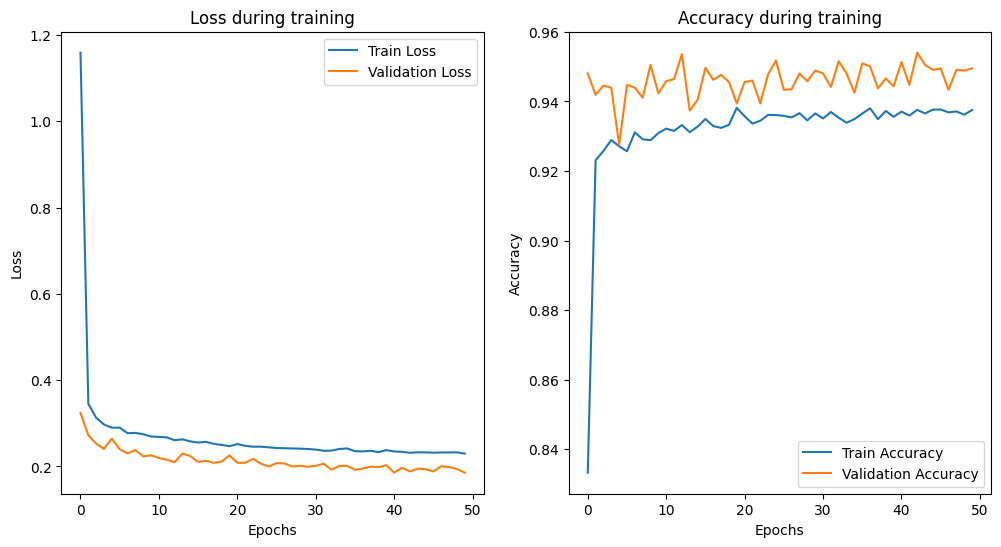

In [ ]:
# Plotting Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluasi Model

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3035
           1       0.94      0.97      0.95      3053

    accuracy                           0.95      6088
   macro avg       0.95      0.95      0.95      6088
weighted avg       0.95      0.95      0.95      6088



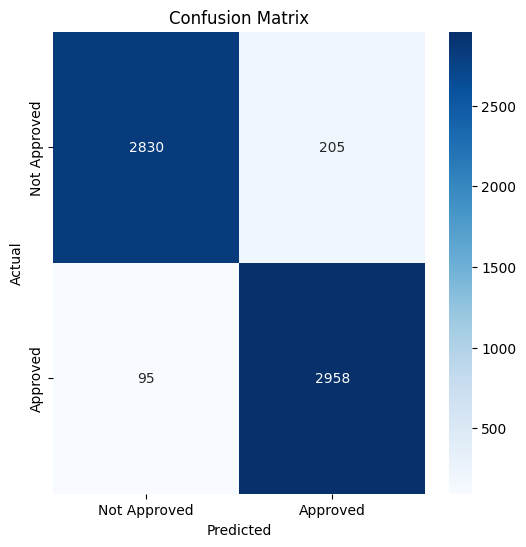

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Mengkonversi prediksi ke kelas biner (0 atau 1)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

print(classification_report(y_test, y_pred_class))

# Visualisasikan confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Konversi Model

In [ ]:
# Simpan model dalam format SavedModel
model.export('model_loan')

# Konversi model dari SavedModel
tflite_converter = tf.lite.TFLiteConverter.from_saved_model('/content/model_loan')
tflite_model = tflite_converter.convert()

with open('model_loan.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at 'model_loan'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_142')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137763209744976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763209755728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763209755344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763209754192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211372560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211373904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211371600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211372176: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()

with open('model_loan.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpsje5u4d7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_142')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137763209744976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763209755728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763209755344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763209754192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211372560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211373904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211371600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137763211372176: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
tfjs.converters.save_keras_model(model, 'model_loan_tfjs')

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!zip -r /content/model_loan_tfjs.zip /content/model_loan_tfjs

  adding: content/model_loan_tfjs/ (stored 0%)
  adding: content/model_loan_tfjs/group1-shard1of1.bin (deflated 5%)
  adding: content/model_loan_tfjs/model.json (deflated 83%)


In [ ]:
!zip -r /content/model_loan.zip /content/model_loan

  adding: content/model_loan/ (stored 0%)
  adding: content/model_loan/variables/ (stored 0%)
  adding: content/model_loan/variables/variables.data-00000-of-00001 (deflated 53%)
  adding: content/model_loan/variables/variables.index (deflated 62%)
  adding: content/model_loan/saved_model.pb (deflated 86%)
  adding: content/model_loan/assets/ (stored 0%)
  adding: content/model_loan/fingerprint.pb (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model_loan_tfjs.zip')
files.download('/content/model_loan.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Inference Model


In [ ]:
# Memuat scaler dan encoder dari file pickle
with open('scaler.pkl', 'rb') as file:
    scaler = joblib.load(file)

with open('label_encoder.pkl', 'rb') as file:
    le = joblib.load(file)

with open('ordinal_encoder.pkl', 'rb') as file:
    oe = joblib.load(file)

# Memuat model H5 yang telah disimpan
model = load_model('model_loan.h5')

In [ ]:
Total_Utang_Terhadap_Pendapatan    0.231755
Pendapatan_Bulanan                 0.205647
Pendapatan_Tahunan                 0.203119
Suku_Bunga_Yang_Diterapkan         0.055673
Jumlah_Pinjaman                    0.039039
Suku_Bunga_Awal                    0.033682
Tingkat_Pendidikan                 0.024572
Kekayaan_Bersih                    0.023374
Pembayaran_Pinjaman_Bulanan        0.022546
Total_Aset                         0.013556
Usia_Pemohon                       0.013175
Skor_Kelayakan_Kredit              0.012981
Pengalaman_Kerja                   0.009654
Durasi_Sejarah_Kredit              0.007202
Periode_Pembayaran_Pinjaman        0.006929
Pembayaran_Utang_Bulanan           0.004332
Saldo_Tabungan                     0.004051
Jumlah_Pengecekan_Kredit           0.003789
Jumlah_Tanggungan                  0.002668
Jumlah_Jalur_Kredit_Aktif          0.002392

In [ ]:
new_data = pd.DataFrame([{'Total_Utang_Terhadap_Pendapatan': 0.17,
                          'Pendapatan_Bulanan': 2000000,
                          'Pendapatan_Tahunan':10000000,
                          'Suku_Bunga_Yang_Diterapkan': 0.3,
                          'Jumlah_Pinjaman': 10000000,
                          'Suku_Bunga_Awal':0.2,
                          'Tingkat_Pendidikan':'Sarjana',
                          'Kekayaan_Bersih': 4000000,
                          'Pembayaran_Pinjaman_Bulanan': 250000,
                          'Total_Aset':10000000,
                          'Usia_Pemohon': 32,
                          'Skor_Kelayakan_Kredit': 5,
                          'Pengalaman_Kerja': 10,
                          'Durasi_Sejarah_Kredit':2,
                          'Periode_Pembayaran_Pinjaman':48,
                          'Pembayaran_Utang_Bulanan':100000,
                          'Saldo_Tabungan':2500000,
                          'Jumlah_Pengecekan_Kredit':1,
                          'Jumlah_Tanggungan':1,
                          'Jumlah_Jalur_Kredit_Aktif':0,
                          }])

In [ ]:
new_data['Tingkat_Pendidikan'] = oe.transform(new_data[['Tingkat_Pendidikan']])

new_data_scaled = scaler.transform(new_data)




# Melakukan prediksi
prediksi_proba = model.predict(new_data_scaled)  # Probabilitas (antara 0 dan 1)

# Konversi probabilitas ke label biner (0 atau 1)
prediksi_label = (prediksi_proba > 0.5).astype(int)

# Menampilkan hasil prediksi
print(f"Prediksi probabilitas LoanApproved: {prediksi_proba[0][0]:.4f}")
print(f"Prediksi kelas LoanApproved: {'Approved' if prediksi_label[0][0] == 1 else 'Not Approved'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Prediksi probabilitas LoanApproved: 0.9999
Prediksi kelas LoanApproved: Approved
